In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def read_log(file_name):
    return pd.read_csv(file_name)

td3_log = read_log('./td3.csv')

## SAC

In [42]:
keys = ['avg_reward','loss_critic_1','loss_critic_2','train_reward','loss_policy']
sac_log_dict= {}
for key in keys:
    sac_log_dict[key] = read_log('./sac/sac_'+key+'.csv')

In [29]:
def plot_seaborn(data,x,y,x_label,y_label,save_as):
    sns.set_theme()
    ax = sns.lineplot(data=data,x=x,y=y)
    plt.tight_layout()
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.figure.savefig(save_as)

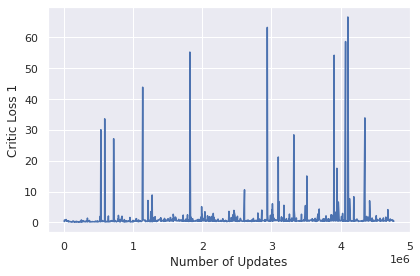

In [39]:
plot_seaborn(sac_log_dict['loss_critic_1'],'Step','Value','Number of Updates','Critic Loss 1','./sac/loss_critic_1')

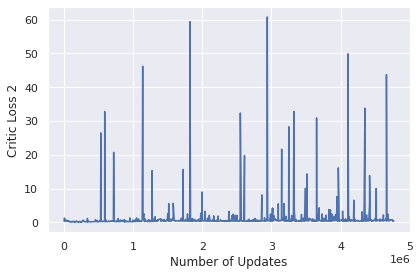

In [40]:
plot_seaborn(sac_log_dict['loss_critic_2'],'Step','Value','Number of Updates','Critic Loss 2','./sac/loss_critic_2')

In [ ]:
plot_seaborn(sac_log_dict['avg_reward'],'Step','Value','Episodes','Test Average Reward','./sac/test_avg_reward')

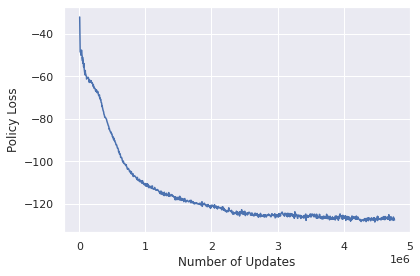

In [46]:
plot_seaborn(sac_log_dict['loss_policy'],'Step','Value','Number of Updates','Policy Loss','./sac/policy_loss')

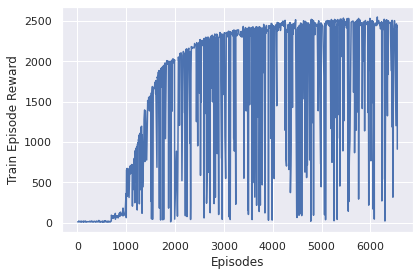

In [48]:
plot_seaborn(sac_log_dict['train_reward'],'Step','Value','Episodes','Train Episode Reward','./sac/train_reward')

## REDQ

In [49]:
redq_test = read_log('./redq/num_3_q_2_u2_train_reward.csv')

In [61]:
td3_step = td3_log['Step'].iloc[-1]

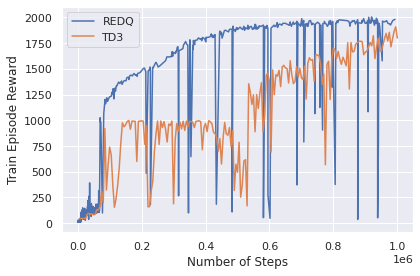

In [66]:
sns.lineplot(data=redq_test[redq_test['Step']<td3_step],x='Step',y='Value')
ax = sns.lineplot(data=td3_log,x='Step',y='Value')
plt.legend(labels=['REDQ','TD3'])
plt.tight_layout()
ax.set(xlabel='Number of Steps', ylabel='Train Episode Reward')
ax.figure.savefig('redq_td3')